In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.shape

(768, 9)

In [2]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
512,9,91,68,0,0,24.2,0.200,58,0
431,3,89,74,16,85,30.4,0.551,38,0
605,1,124,60,32,0,35.8,0.514,21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [6]:
numeric_col=X_train.columns
numeric_col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

transformer=ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),numeric_col)
],remainder='passthrough')

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

pipeline=make_pipeline(transformer,Lasso(alpha=0.01))

In [12]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.01))])

In [13]:
lasso=pipeline.named_steps['lasso']
print(lasso.coef_)

[ 0.04563218  0.17988601 -0.02125716  0.00520523 -0.00215504  0.07338464
  0.03007154  0.04409813]


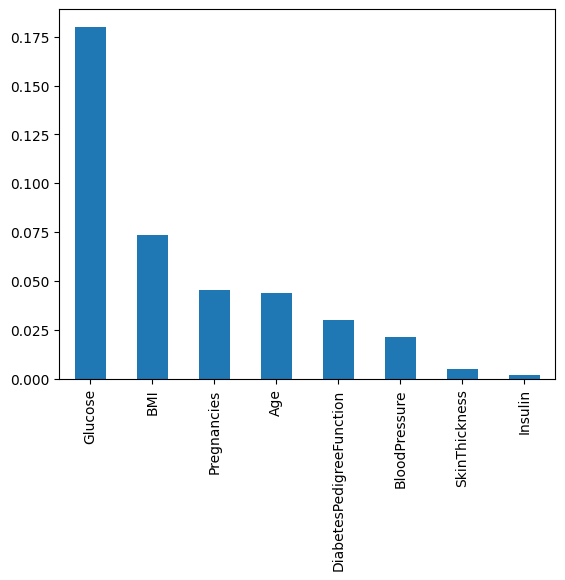

In [18]:
import matplotlib.pylab as plt
import numpy as np

x=pd.Series(np.abs(lasso.coef_),index=numeric_col).sort_values(ascending=False).plot(kind='bar')

**Important Points**
1. We can use the coefficients of Lasso regularization for feature selection. To get the best result, try standardizing the numerical columns and make sure all the linear regression assumptions are satisfied. Without standardization, larger-scale features can dominate.
2. Lasso (L1) regularization adds a penalty that can shrink some coefficients exactly to zero. Features with non-zero coefficients are considered important; those with zero coefficients can be discarded.